# Librerias

In [7]:
from sklearn.manifold import MDS
import sys
import ipywidgets

from mathchords.io import ExperimentHandler
from mathchords.functions.characteristics import process

import mathchords.functions.gen_chords as gen
import mathchords.functions.clustering as cg
import mathchords.functions.characteristics as ce
#import pruebas1 as p

from mathchords.constans import SCALES

# cargar datos

In [8]:
BASE_PATH = "../data/"
handler = ExperimentHandler(BASE_PATH)

# Extraer Datos y caractertisiticas

In [9]:
datos = handler.read("experiment_data.pkl")
chords=datos["chords"]
results_structure=ce.process(chords, datos, ce.transpose_to_zero, BASE_PATH)['results']
results_intervals_theory=ce.process(chords, datos, ce.interval_vector, BASE_PATH)['results']
results_intervals_histo_12=ce.process(chords, datos, ce.interval_histogram_with_dissmeasure, BASE_PATH)['results']
results_binary_notes=ce.process(chords, datos, ce.binary_pitch_class_set, BASE_PATH)['results']
results_binary_intervals_12=ce.process(chords, datos, ce.interval_histogram, BASE_PATH)['results']
results_polar_notes=ce.process(chords, datos, ce.polar_pitch_classes, BASE_PATH)['results']
results_polar_degree=ce.polar_degree(datos)
chord_ids = list(results_intervals_theory.keys())
def perform_mds(data, n_components=2):
    mds = MDS(n_components=n_components,  max_iter=30000,eps=1e-16)
    val=mds.fit_transform(data)
    print(mds.n_iter_,mds.stress_)
    return val,mds.dissimilarity_matrix_



KeyError: 'bass'

In [ ]:
chords[0]

{'octave': 5, 'bass': 0, 'root': 0, 'degree': 1, 'intervals': [4, 3]}

# Acordes transpuestos a cero: estructura e intervalos clasicos

In [ ]:
vector_encoding = [
    results_structure[chord_id]['feature_vector'] + results_intervals_theory[chord_id]['feature_vector']
    for chord_id in results_intervals_theory.keys()
]


# Realiza MDS en los datos
vector_encoding_mds,matrix = perform_mds(vector_encoding)
cg.plot_chords_with_selection(vector_encoding_mds,matrix, chord_ids, datos,True )

print(vector_encoding)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


99 4.794725833495432e-15
['C', 'C/E', 'C/G', 'Dm', 'Dm/F', 'Dm/A', 'Em', 'Em/G', 'Em/B', 'F', 'F/A', 'F/C', 'G', 'G/B', 'G/D', 'Am', 'Am/C', 'Am/E', 'B°', 'B°/D', 'B°/F']


Dropdown(description='Chord ID:', options=(('Chord ID: chord_0, C', 'chord_0'), ('Chord ID: chord_1, C/E', 'ch…

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'hovertext': [Root: C<br>Bass: C<br>Octave: 5<br>Degree:
                            1<br>Intervals: [4, 3], Root: C<br>Bass: E<br>Octave:
                            5<br>Degree: 1<br>Intervals: [4, 3], Root: C<br>Bass:
                            G<br>Octave: 5<br>Degree: 1<br>Intervals: [4, 3], Root:
                            D<br>Bass: D<br>Octave: 5<br>Degree: 2<br>Intervals:
                            [3, 4], Root: D<br>Bass: F<br>Octave: 5<br>Degree:
                            2<br>Intervals: [3, 4], Root: D<br>Bass: A<br>Octave:
                            5<br>Degree: 2<br>Intervals: [3, 4], Root: E<br>Bass:
                            E<br>Octave: 5<br>Degree: 3<br>Intervals: [3, 4], Root:
                            E<br>Bass: G<br>Octave: 5<br>Degree: 3<br>Intervals:
                            [3, 4], Root: E<br>Bass: B<br>Octave: 5<br>Degree:
                            3<br>Intervals: [3, 4], Root: F<br>

[[0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 4, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 7, 0, 0, 1, 1, 1, 0], [0, 3, 6, 0, 0, 2, 0, 0, 1], [0, 3, 6, 0, 0, 2, 0, 0, 1], [0, 3, 6, 0, 0, 2, 0, 0, 1]]


# Sólo vector clasico

In [ ]:

vector_encoding2 = [
    # results[chord_id]['feature_vector'] +
     #results_polar_degree[chord_id]['feature_vector'] +

    results_intervals_theory[chord_id]['feature_vector']
    for chord_id in results_structure.keys()
]

# Realiza MDS en los datos
vector_encoding_mds2, matrix = perform_mds(vector_encoding2)
cg.plot_chords_with_selection(vector_encoding_mds2,matrix, chord_ids, datos,True, True )
print(vector_encoding2)

142 2.664535259100379e-15
['C', 'C/E', 'C/G', 'Dm', 'Dm/F', 'Dm/A', 'Em', 'Em/G', 'Em/B', 'F', 'F/A', 'F/C', 'G', 'G/B', 'G/D', 'Am', 'Am/C', 'Am/E', 'B°', 'B°/D', 'B°/F']


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



Dropdown(description='Chord ID:', options=(('Chord ID: chord_0, C', 'chord_0'), ('Chord ID: chord_1, C/E', 'ch…

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'hovertext': [Root: C<br>Bass: C<br>Octave: 5<br>Degree:
                            1<br>Intervals: [4, 3], Root: C<br>Bass: E<br>Octave:
                            5<br>Degree: 1<br>Intervals: [4, 3], Root: C<br>Bass:
                            G<br>Octave: 5<br>Degree: 1<br>Intervals: [4, 3], Root:
                            D<br>Bass: D<br>Octave: 5<br>Degree: 2<br>Intervals:
                            [3, 4], Root: D<br>Bass: F<br>Octave: 5<br>Degree:
                            2<br>Intervals: [3, 4], Root: D<br>Bass: A<br>Octave:
                            5<br>Degree: 2<br>Intervals: [3, 4], Root: E<br>Bass:
                            E<br>Octave: 5<br>Degree: 3<br>Intervals: [3, 4], Root:
                            E<br>Bass: G<br>Octave: 5<br>Degree: 3<br>Intervals:
                            [3, 4], Root: E<br>Bass: B<br>Octave: 5<br>Degree:
                            3<br>Intervals: [3, 4], Root: F<br>

[[0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 2, 0, 0, 1], [0, 0, 2, 0, 0, 1], [0, 0, 2, 0, 0, 1]]


# Funcion Polar con Intervalos clasicos

In [ ]:


vector_encoding4 = [
    # results[chord_id]['feature_vector'] +
     results_polar_degree[chord_id]['feature_vector'] + results_intervals_theory[chord_id]['feature_vector']+ results_polar_notes[chord_id]['feature_vector']
    for chord_id in results_intervals_theory.keys()
]

# Realiza MDS en los datos
vector_encoding_mds4, matrix  = perform_mds(vector_encoding4)
cg.plot_chords_with_selection(vector_encoding_mds4,matrix, chord_ids, datos,False,True )
print(vector_encoding4)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


184 64.68016419134369
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


Dropdown(description='Chord ID:', options=(('Chord ID: chord_0, C', 'chord_0'), ('Chord ID: chord_1, C/E', 'ch…

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'hovertext': [Root: C<br>Bass: C<br>Octave: 5<br>Degree:
                            1<br>Intervals: [4, 3], Root: C<br>Bass: E<br>Octave:
                            5<br>Degree: 1<br>Intervals: [4, 3], Root: C<br>Bass:
                            G<br>Octave: 5<br>Degree: 1<br>Intervals: [4, 3], Root:
                            D<br>Bass: D<br>Octave: 5<br>Degree: 2<br>Intervals:
                            [3, 4], Root: D<br>Bass: F<br>Octave: 5<br>Degree:
                            2<br>Intervals: [3, 4], Root: D<br>Bass: A<br>Octave:
                            5<br>Degree: 2<br>Intervals: [3, 4], Root: E<br>Bass:
                            E<br>Octave: 5<br>Degree: 3<br>Intervals: [3, 4], Root:
                            E<br>Bass: G<br>Octave: 5<br>Degree: 3<br>Intervals:
                            [3, 4], Root: E<br>Bass: B<br>Octave: 5<br>Degree:
                            3<br>Intervals: [3, 4], Root: F<br>

[[1.0, 0.0, 0, 0, 1, 1, 1, 0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4999999999999998, 0.8660254037844387, 0.0, 0.0, 0.0, 0.0, -0.8660254037844388, -0.4999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0, 0, 1, 1, 1, 0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4999999999999998, 0.8660254037844387, 0.0, 0.0, 0.0, 0.0, -0.8660254037844388, -0.4999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0, 0, 1, 1, 1, 0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4999999999999998, 0.8660254037844387, 0.0, 0.0, 0.0, 0.0, -0.8660254037844388, -0.4999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6234898018587336, 0.7818314824680298, 0, 0, 1, 1, 1, 0, 0.0, 0.0, 0.0, 0.0, 0.5000000000000001, 0.8660254037844386, 0.0, 0.0, 0.0, 0.0, -0.8660254037844385, 0.5000000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8369701987210297e-16, -1.0, 0.0, 0.0, 0.0, 0.0], [0.6234898018587336, 0.7818314824680298, 0, 0, 1, 1, 1, 0, 0.0, 0.0, 0.0, 0.0, 0.5000000000000001,

# Funcion para  probar metricas y dispersiones v1

In [ ]:
# Vamos a definir primero una versión modificada de `perform_mds` que acepte una métrica como argumento.
# Esta función será el núcleo para aplicar MDS con diferentes métricas.

from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cosine, mahalanobis
from sklearn.decomposition import PCA
import numpy as np

def perform_mds2(data, metric='euclidean', n_components=2, p=2):
    """
    Realiza la reducción de dimensionalidad utilizando MDS, calculando la matriz de disimilitud
    basada en la métrica especificada.

    Parámetros:
    - data (np.array): Conjunto de datos.
    - metric (str): La métrica de disimilitud a utilizar.
    - n_components (int): El número de dimensiones en el espacio de destino.
    - p (int): El parámetro de la métrica Minkowski para `pdist`.

    Retorna:
    - np.array: Las coordenadas en el espacio de destino.
    - np.array: La matriz de disimilitud utilizada.
    """
    data=np.array(data)
    # Calcular la matriz de disimilitud basada en la métrica especificada
    if metric in ['euclidean', 'cityblock', 'cosine', 'chebyshev', 'jaccard', 'hamming']:

        if metric in ['jaccard', 'hamming']:
            # Para Jaccard y Hamming, usamos sklearn
            dissimilarity_matrix = pairwise_distances(data, metric=metric)
        else:
            # Para el resto de las métricas, usamos scipy
            dissimilarity_matrix = squareform(pdist(data, metric=metric))
    elif metric == 'mahalanobis':
        # Para Mahalanobis, necesitamos calcular la matriz de inversión de covarianza
        # Añadimos una pequeña regularización para asegurar la inversión
        cov_inv = np.linalg.pinv(np.cov(data.T)
        + np.eye(data.shape[1]) *15)
        dissimilarity_matrix = squareform(pdist(data, metric=lambda u, v: mahalanobis(u, v, cov_inv)))
    else:
        raise ValueError("Métrica no soportada.")

    # Realizar MDS
    mds = MDS(n_components=n_components, dissimilarity='precomputed', max_iter=30000, eps=1e-16)
    val = mds.fit_transform(dissimilarity_matrix)
    print(f"Número de iteraciones: {mds.n_iter_}, Stress: {mds.stress_}")
    return val, dissimilarity_matrix

# Nota: Las implementaciones completas y el código de prueba se proporcionarán después de la revisión.


# Ahora, definiremos funciones auxiliares para calcular cada una de las medidas de dispersión.

def calculate_cv(data):
    """
    Calcula el Coeficiente de Variación (CV) para cada dimensión del conjunto de datos.

    Args:
    - data: Datos en el espacio de MDS (numpy array).

    Returns:
    - cv: Coeficiente de Variación para cada dimensión.
    """
    std_dev = np.std(data, axis=0)
    mean = np.mean(data, axis=0)
    cv = std_dev / mean
    return cv

def calculate_distance_to_centroid(data):
    """
    Calcula la distancia promedio al centroide para un conjunto de datos.

    Args:
    - data: Datos en el espacio de MDS (numpy array).

    Returns:
    - mean_distance: Distancia promedio al centroide.
    """
    centroid = np.mean(data, axis=0)
    distances = np.sqrt(np.sum((data - centroid)**2, axis=1))
    mean_distance = np.mean(distances)
    return mean_distance

def calculate_pca_variance(data):
    """
    Calcula la varianza explicada por cada componente principal después de aplicar PCA a los datos.

    Args:
    - data: Datos en el espacio de MDS (numpy array).

    Returns:
    - explained_variance: Varianza explicada por cada componente principal.
    """
    pca = PCA(n_components=2)
    pca.fit(data)
    explained_variance = pca.explained_variance_ratio_
    return explained_variance

# Nota: Estas funciones son prototipos y pueden necesitar ajustes para integrarse con el resto del código y datos.

# Las llamadas a estas funciones y su integración con el flujo de trabajo general se realizarán después.

resultados1 = {
    'euclidian': {
        'C': {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'D': {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'E': {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'F':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'G':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'A':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'B':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},

    },
    'citiblock': {
        'C':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'D':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'E':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'F':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'G':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'A':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'B':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},

    },
    'cosine': {
        'C':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'D':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'E':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'F':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'G':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'A':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},
        'B':  {'CV': [], 'Desviacion_std': None, 'Varianza': []},

    },

}

import numpy as np
import matplotlib.pyplot as plt

def segment_and_calculate_and_visualize_metrics(mds_results):
    """
    Segmenta los resultados de MDS por grupos de acordes, calcula medidas de dispersión para cada grupo,
    proporciona visualizaciones gráficas de estas medidas, y compara las medidas de dispersión entre grupos de acordes.

    Args:
    - mds_results: Array de numpy con los resultados de MDS, asumiendo dos dimensiones.

    Returns:
    - Un diccionario con los resultados de las medidas de dispersión y visualizaciones para cada grupo de acordes.
    """
    familias_nombres = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
    acordes_por_familia = 3
    resultados = {nombre: {'Varianza': None, 'Desviación Estándar al Centroide': None, 'Distancia_media': None}
                   for nombre in familias_nombres}

    # Variables para el gráfico de barras
    varianzas, desviaciones_std, distancias_medias = [], [], []

    # Gráficos de dispersión por grupo
    fig, axs = plt.subplots(1, len(familias_nombres), figsize=(20, 4), squeeze=False)

    for i, nombre in enumerate(familias_nombres):
        inicio = i * acordes_por_familia
        fin = inicio + acordes_por_familia
        datos_familia = mds_results[inicio:fin, :]

        # Cálculos
        centroide = np.mean(datos_familia, axis=0)
        varianza = np.trace(np.cov(datos_familia, rowvar=False))
        distancias_al_centroide = np.sqrt(np.sum((datos_familia - centroide) ** 2, axis=1))

        #np.var(datos_familia, axis=0).mean()
        desviacion_std = np.std(distancias_al_centroide)# Calculamos las distancias entre cada par de puntos y promediamos
        distancias = np.sqrt(((datos_familia - datos_familia[:, np.newaxis]) ** 2).sum(axis=2))
        # Solo tomamos la parte superior de la matriz de distancias para evitar duplicados
        distancia_media = np.mean(distancias[np.triu_indices(acordes_por_familia, k=1)])

        resultados[nombre]['Varianza'] = varianza
        resultados[nombre]['Desviación Estándar al Centroide'] = desviacion_std
        resultados[nombre]['Distancia_media'] = distancia_media

        varianzas.append(varianza)
        desviaciones_std.append(desviacion_std)
        distancias_medias.append(distancia_media)

        # Visualización de dispersión
        axs[0, i].scatter(datos_familia[:, 0], datos_familia[:, 1], label=f'Acorde {nombre}')
        axs[0, i].scatter(centroide[0], centroide[1], color='red', label='Centroide', zorder=5)
        axs[0, i].set_title(f'Acorde {nombre}')
        axs[0, i].legend()

    plt.tight_layout()
    plt.show()

    # Gráfico de barras para comparación de medidas de dispersión
    x = np.arange(len(familias_nombres))
    width = 0.25

    fig, ax = plt.subplots()
    rects1 = ax.bar(x + width, varianzas, width, label='Varianza')
    rects2 = ax.bar(x, desviaciones_std, width, label='Desviación Estándar al Centroide ')
    rects3 = ax.bar(x - width, distancias_medias, width, label='Distancia Media')

    ax.set_ylabel('Medidas')
     # Usamos una escala lineal para el eje Y, pero establecemos un límite inferior pequeño para evitar la visualización de valores extremadamente pequeños como grandes.
    ax.set_yscale('linear')
    ax.set_ylim(bottom=1e-10)  # Ajustar según sea necesario basado en la magnitud de tus datos
    ax.set_title('Comparación de Medidas de Dispersión por Grupo de Acordes')
    ax.set_xticks(x)
    ax.set_xticklabels(familias_nombres)
    ax.legend()

    fig.tight_layout()
    plt.show()

    return resultados




# Para usar esta función, necesitarías tener los resultados de MDS en un array de numpy `mds_results`.
# Aquí hay un ejemplo de cómo llamar a la función, asumiendo que `mds_coords` contiene los resultados de MDS:

# resultados_por_familia = segment_and_calculate_metrics(mds_coords)

# Nota: `mds_coords` debe ser reemplazado por tu variable real que contenga los resultados de MDS.
# Esta función es un ejemplo y puede necesitar ajustes para adaptarse completamente a tus datos y requerimientos específicos.



# fucnion para probar metricas y dispersion v2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def segment_and_calculate_and_visualize_metrics_original_space(mds_results):
    """
    Segmenta los resultados por grupos de acordes en el espacio original, calcula medidas de dispersión para cada grupo,
    proporciona visualizaciones gráficas de estas medidas, y compara las medidas de dispersión entre grupos de acordes.

    Args:
    - mds_results: Array de numpy con los resultados, asumiendo cualquier número de dimensiones.

    Returns:
    - Un diccionario con los resultados de las medidas de dispersión para cada grupo de acordes.
    """
    familias_nombres = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si']
    acordes_por_familia = 3
    resultados = {nombre: {'Varianza': None, 'Desviacion_std': None, 'Distancia_media': None}
                   for nombre in familias_nombres}

    # Variables para el gráfico de barras
    varianzas, desviaciones_std, distancias_medias = [], [], []

    for i, nombre in enumerate(familias_nombres):
        inicio = i * acordes_por_familia
        fin = inicio + acordes_por_familia
        datos_familia = mds_results[inicio:fin]

        # Cálculos
        centroide = np.mean(datos_familia, axis=0)

       # Cálculo usando la matriz de covarianza
        #cov_matrix = np.cov(datos_familia, rowvar=False)
        #varianza = np.trace(cov_matrix)
        #desviacion_std = np.sqrt(varianza / datos_familia.shape[1])  # Normalizar por el número de dimensiones
        # Calculate the variance as the sum of variances of each dimension using sample variance (ddof=1)
        #varianza = np.sum(np.var(datos_familia, axis=0))
        varianza = np.trace(np.cov(datos_familia, rowvar=False))
        distancias_al_centroide = np.sqrt(np.sum((datos_familia - centroide) ** 2, axis=1))
        desviacion_std = np.std(distancias_al_centroide)
        # Calculate the standard deviation as the square root of the variance
        #desviacion_std = np.sqrt(varianza)
        distancias = np.sqrt(np.sum((datos_familia[:, np.newaxis] - datos_familia) ** 2, axis=2))
        distancia_media = np.mean(distancias[np.triu_indices(acordes_por_familia, k=1)])

        resultados[nombre]['Varianza'] = varianza
        resultados[nombre]['Desviación Estándar al Centroide'] = desviacion_std
        resultados[nombre]['Distancia_media'] = distancia_media

        varianzas.append(varianza)
        desviaciones_std.append(desviacion_std)
        distancias_medias.append(distancia_media)
    x = np.arange(len(familias_nombres))  # the label locations
    width = 0.35  # the width of the bars

    # Gráfico de barras para la Varianza
    fig1, ax1 = plt.subplots()
    ax1.bar(x, varianzas, width, label='Varianza')
    ax1.set_ylabel('Varianza')
    ax1.set_title('Varianza por Grupo de Acordes')
    ax1.set_xticks(x)
    ax1.set_xticklabels(familias_nombres)
    ax1.legend()
    fig1.tight_layout()

    # Gráfico de barras para la Desviación Estándar al Centroide
    fig2, ax2 = plt.subplots()
    ax2.bar(x, desviaciones_std, width, label='Desviación Estándar al Centroide', color='orange')
    ax2.set_ylabel('Desviación Estándar al Centroide')
    ax2.set_title('Desviación Estándar al Centroide por Grupo de Acordes')
    ax2.set_xticks(x)
    ax2.set_xticklabels(familias_nombres)
    ax2.legend()
    fig2.tight_layout()

    # Gráfico de barras para la Distancia Media
    fig3, ax3 = plt.subplots()
    ax3.bar(x, distancias_medias, width, label='Distancia Media', color='green')
    ax3.set_ylabel('Distancia Media')
    ax3.set_title('Distancia Media por Grupo de Acordes')
    ax3.set_xticks(x)
    ax3.set_xticklabels(familias_nombres)
    ax3.legend()
    fig3.tight_layout()

    # Mostrar los gráficos
    plt.show()

    return resultados



In [ ]:



# Llamada a la función adaptada
#Dispersion_our = segment_and_calculate_and_visualize_metrics_original_space(np.array(vector_encoding5))

In [ ]:
Dispersion_Classic = segment_and_calculate_and_visualize_metrics(np.array(vector_encoding5))

# Experimento Clasico: Vector clasico con notas

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



108 12.774364157308778
Número de iteraciones: 126, Stress: 0.8644960479062145
['C', 'C/E', 'C/G', 'Dm', 'Dm/F', 'Dm/A', 'Em', 'Em/G', 'Em/B', 'F', 'F/A', 'F/C', 'G', 'G/B', 'G/D', 'Am', 'Am/C', 'Am/E', 'B°', 'B°/D', 'B°/F']


Dropdown(description='Chord ID:', options=(('Chord ID: chord_0, C', 'chord_0'), ('Chord ID: chord_1, C/E', 'ch…

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'hovertext': [Root: C<br>Bass: C<br>Octave: 5<br>Degree:
                            1<br>Intervals: [4, 3], Root: C<br>Bass: E<br>Octave:
                            5<br>Degree: 1<br>Intervals: [4, 3], Root: C<br>Bass:
                            G<br>Octave: 5<br>Degree: 1<br>Intervals: [4, 3], Root:
                            D<br>Bass: D<br>Octave: 5<br>Degree: 2<br>Intervals:
                            [3, 4], Root: D<br>Bass: F<br>Octave: 5<br>Degree:
                            2<br>Intervals: [3, 4], Root: D<br>Bass: A<br>Octave:
                            5<br>Degree: 2<br>Intervals: [3, 4], Root: E<br>Bass:
                            E<br>Octave: 5<br>Degree: 3<br>Intervals: [3, 4], Root:
                            E<br>Bass: G<br>Octave: 5<br>Degree: 3<br>Intervals:
                            [3, 4], Root: E<br>Bass: B<br>Octave: 5<br>Degree:
                            3<br>Intervals: [3, 4], Root: F<br>

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 2, 

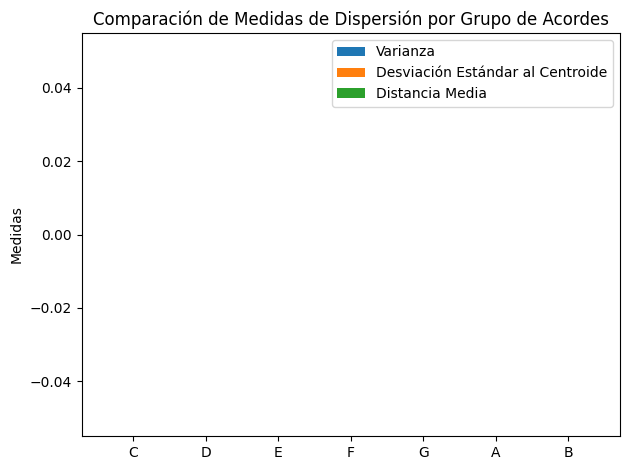

In [ ]:


vector_encoding3 = [

      #[1.5*x for x in results_polar_degree[chord_id]['feature_vector']]  +
    # results[chord_id]['feature_vector'] +
     #results_polar_degree[chord_id]['feature_vector'] +
     results_intervals_theory[chord_id]['feature_vector']
      +

    results_binary_notes[chord_id]['feature_vector']
      #results_binary_intervals_12[chord_id]['feature_vector']
    for chord_id in results_intervals_theory.keys()
]

# Realiza MDS en los datos
vector_encoding_mds3,matrix = perform_mds(vector_encoding3)
vector_encoding_mds3_classic, matrix_classic=perform_mds2(vector_encoding3,'mahalanobis')
cg.plot_chords_with_selection(vector_encoding_mds3_classic,matrix_classic, chord_ids, datos,True,True )

for i in vector_encoding3:
    print(i)

classic=segment_and_calculate_and_visualize_metrics_original_space(np.array(vector_encoding3))


In [ ]:
classic

# Experimento Propuesto: Intervalos ponderados con rugosidad y notas

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



541 47.17503168629542


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



Número de iteraciones: 186, Stress: 0.9575022147566687
['C', 'C/E', 'C/G', 'Dm', 'Dm/F', 'Dm/A', 'Em', 'Em/G', 'Em/B', 'F', 'F/A', 'F/C', 'G', 'G/B', 'G/D', 'Am', 'Am/C', 'Am/E', 'B°', 'B°/D', 'B°/F']


Dropdown(description='Chord ID:', options=(('Chord ID: chord_0, C', 'chord_0'), ('Chord ID: chord_1, C/E', 'ch…

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'hovertext': [Root: C<br>Bass: C<br>Octave: 5<br>Degree:
                            1<br>Intervals: [4, 3], Root: C<br>Bass: E<br>Octave:
                            5<br>Degree: 1<br>Intervals: [4, 3], Root: C<br>Bass:
                            G<br>Octave: 5<br>Degree: 1<br>Intervals: [4, 3], Root:
                            D<br>Bass: D<br>Octave: 5<br>Degree: 2<br>Intervals:
                            [3, 4], Root: D<br>Bass: F<br>Octave: 5<br>Degree:
                            2<br>Intervals: [3, 4], Root: D<br>Bass: A<br>Octave:
                            5<br>Degree: 2<br>Intervals: [3, 4], Root: E<br>Bass:
                            E<br>Octave: 5<br>Degree: 3<br>Intervals: [3, 4], Root:
                            E<br>Bass: G<br>Octave: 5<br>Degree: 3<br>Intervals:
                            [3, 4], Root: E<br>Bass: B<br>Octave: 5<br>Degree:
                            3<br>Intervals: [3, 4], Root: F<br>

[0, 0, 1.737764418752922, 0.9767088023539988, 0, 0, 0.03111923187083253, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1.737764418752922, 0, 0.09156789258655498, 0, 0, 0.0022556833919568893, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0.17266902870542378, 0.09156789258655498, 0, 0, 0, 0.00013853031760726754, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 2.1066612074350157, 0.4868846141308711, 0, 0, 0.018000366282845758, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0.4868846141308711, 0.06209468694368946, 0, 0, 0, 0.000305814313490894, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0.6189768973158128, 0, 0.06209468694368946, 0, 0, 0.00040904816319696903, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1.737764418752922, 0.36358023206809986, 0, 0, 0.010258843439465063, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0.36358023206809986, 0.04203166429383968, 0, 0, 0, 0.00013853031760726754, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0

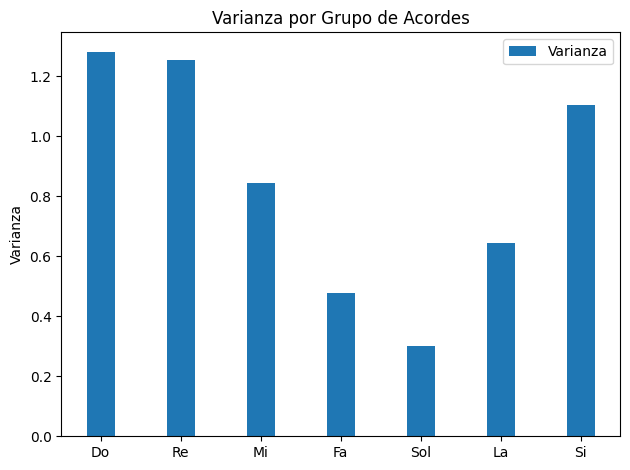

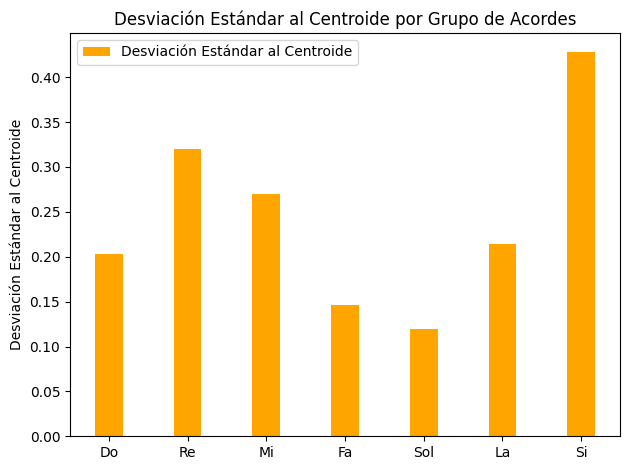

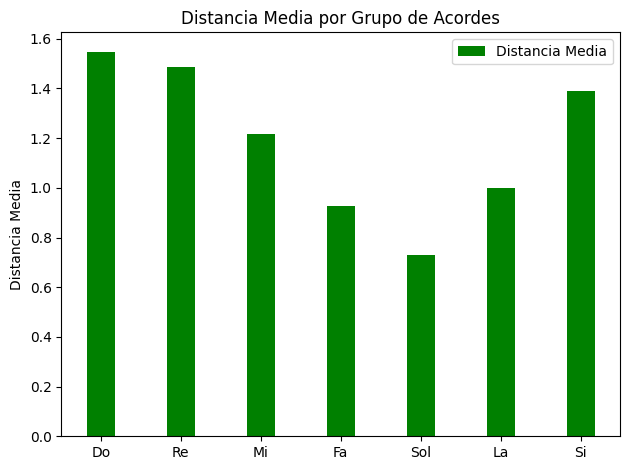

In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
import numpy as np

vector_encoding5 = [

     [10*x for x in results_intervals_histo_12[chord_id]['feature_vector']]
     #results_polar_degree[chord_id]['feature_vector'] +
     #results_intervals_histo_12[chord_id]['feature_vector']
     #+
     #results_binary_intervals_12[chord_id]['feature_vector']
     +
     results_binary_notes[chord_id]['feature_vector']
    #results_polar_notes[chord_id]['feature_vector']
    for chord_id in results_intervals_theory.keys()
]

# Realiza MDS en los datos
vector_encoding_mds5,matrix = perform_mds(vector_encoding5)
vector_encoding_mds5_our, matrix2=perform_mds2(vector_encoding5,'hamming')
cg.plot_chords_with_selection(vector_encoding_mds5_our,matrix2, chord_ids, datos,True,True )

for i in vector_encoding5:
    print(i)

Our_multidim=segment_and_calculate_and_visualize_metrics_original_space(np.array(vector_encoding5))
#Our_2dim=segment_and_calculate_and_visualize_metrics_original_space(np.array(vector_encoding_mds5_our))



In [ ]:
vector_encoding_mds5_our

array([[-1.19615412, -0.46525396],
       [-0.92546296, -0.35501381],
       [-0.79027891, -0.73693607],
       [ 1.17377799,  0.35918143],
       [ 1.09403855, -0.32758328],
       [ 0.86380399, -0.06268436],
       [-0.91957074,  0.62069256],
       [-1.02134539,  0.30824069],
       [-0.77816877,  0.30850919],
       [ 0.54952669, -0.67269455],
       [ 0.54580163, -0.56845842],
       [ 0.65559262, -1.0086678 ],
       [-0.22668595,  0.75550676],
       [-0.17754402,  0.81444027],
       [-0.43239546,  1.00513481],
       [-0.15242925, -0.75785086],
       [-0.14704423, -1.2752357 ],
       [-0.16172837, -0.80709349],
       [ 0.90875534,  1.32735457],
       [ 0.68660322,  0.96082724],
       [ 0.45090813,  0.57758478]])

In [ ]:


Our_multidim

{'C': {'Varianza': 1.2814368952554076,
  'Desviacion_std': 0.23603950436272383,
  'Distancia_media': 1.5483372160447606},
 'D': {'Varianza': 1.2528052920338903,
  'Desviacion_std': 0.23338765028557384,
  'Distancia_media': 1.4872798757203236},
 'E': {'Varianza': 0.8443906375404299,
  'Desviacion_std': 0.19160541854238178,
  'Distancia_media': 1.2156433709439671},
 'F': {'Varianza': 0.4781398261353855,
  'Desviacion_std': 0.1441828287031533,
  'Distancia_media': 0.9266516291825259},
 'G': {'Varianza': 0.3007779069548292,
  'Desviacion_std': 0.11435602433795904,
  'Distancia_media': 0.7305867664581336},
 'A': {'Varianza': 0.6450796020132438,
  'Desviacion_std': 0.16747220431452833,
  'Distancia_media': 0.9990594941635859},
 'B': {'Varianza': 1.1037829369261571,
  'Desviacion_std': 0.21906748383785832,
  'Distancia_media': 1.3910273910080384}}

In [ ]:
Our_2dim

{'C': {'Varianza': 0.17249312744175932,
  'Desviacion_std': None,
  'Distancia_media': 0.5753448575465447,
  'Desviación Estándar al Centroide': 0.05925624073582236},
 'D': {'Varianza': 0.3468361867785864,
  'Desviacion_std': None,
  'Distancia_media': 0.8000223810616035,
  'Desviación Estándar al Centroide': 0.1413335014521801},
 'E': {'Varianza': 0.11245496260450477,
  'Desviacion_std': None,
  'Distancia_media': 0.4685985525591419,
  'Desviación Estándar al Centroide': 0.04294887059267786},
 'F': {'Varianza': 0.13017522035050622,
  'Desviacion_std': None,
  'Distancia_media': 0.4547981799598762,
  'Desviación Estándar al Centroide': 0.11087120062249733},
 'G': {'Varianza': 0.07546199724862436,
  'Desviacion_std': None,
  'Distancia_media': 0.34829439350012054,
  'Desviación Estándar al Centroide': 0.06938829307158631},
 'A': {'Varianza': 0.18115981390551192,
  'Desviacion_std': None,
  'Distancia_media': 0.5085082927248569,
  'Desviación Estándar al Centroide': 0.11739895004760759},

In [ ]:
0.0220/0.0311

0.7073954983922829